In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
def isBee(x): return x[0].isupper()

In [ ]:
Insects = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
path = Path('/content/gdrive/MyDrive/Bee_or_Wasp')

In [ ]:
print(path)

/content/gdrive/MyDrive/Bee_or_Wasp


In [ ]:
dls = Insects.dataloaders(path, bs=8)
print("Training images:", len(dls.train_ds))
print("Validation images:", len(dls.valid_ds))

Training images: 28
Validation images: 7


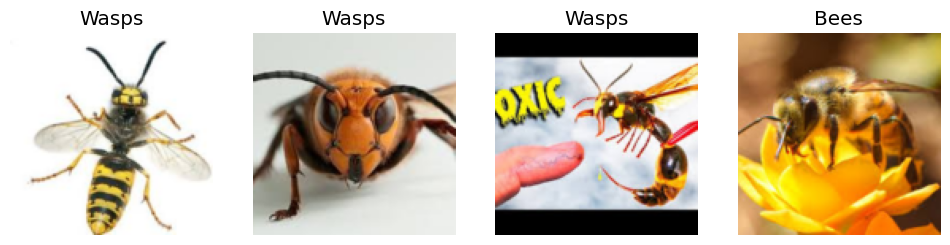

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 217MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.377883,1.255258,0.428571,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.603247,0.494150,0.285714,00:00
1,0.611316,0.279101,0.142857,00:00
2,0.518064,0.183825,0.000000,00:00
3,0.412135,0.287858,0.142857,00:00


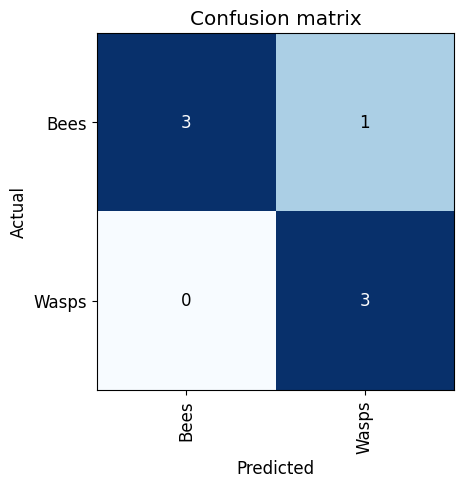

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

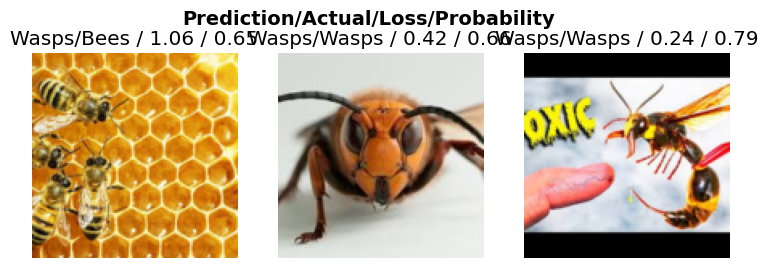

In [ ]:
interp.plot_top_losses(3, nrows=1)

In [ ]:
learn.export()

In [ ]:
path = Path()

In [ ]:
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [ ]:
learninf = load_learner(path/'export.pkl')

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [25]:
learninf.predict("/content/drive/MyDrive/Bee_or_Wasp/Test_2.jpg")

('Wasps', tensor(1), tensor([1.2485e-04, 9.9988e-01]))